# 와인 품질 예측하기


![](https://labelyourdata.com/img/article-illustrations/ml_essential_tool.jpg)

## 1.환경준비

### (1) 라이브러리 로딩

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [97]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [98]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/winequality-white.csv"
data = pd.read_csv(path)

In [99]:
# 각 행은 한 구역에서 생산된 와인
data['quality'] = np.where(data['quality'] == 3, 4, np.where(data['quality'] == 9, 8, data['quality']))
data['quality'] = data['quality'] - 4
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


* 범주가 5개 입니다.
    * 0 - 최하  ~  4 - 최상

In [100]:
data['quality'].value_counts()

2    2198
1    1457
3     880
0     183
4     180
Name: quality, dtype: int64

## 2.데이터 준비

### (1) 데이터 준비
* y에 대한 전처리 : 위에서 이미 0 ~ 4로 범주를 맞췄습니다.
* x, y 나누기

In [101]:
target = 'quality'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 데이터 분할

In [102]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size= .3, random_state = 20)

In [103]:
y_train

2392    3
1068    3
3143    1
3939    2
2123    1
       ..
1607    3
3915    3
1428    3
4367    1
2522    4
Name: quality, Length: 3428, dtype: int64

### (3) 스케일링

In [104]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

최소 3개 이상의 모델을 생성하고 성능을 비교하시오.

In [105]:
n = x_train.shape[1]
n

11

### (1) 모델1

In [117]:
clear_session()

model = Sequential([
    Dense(8, input_shape=(n, ), activation='relu'),
    Dense(5, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model.compile(optimizer=Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs=50, validation_split=.3, verbose=0).history

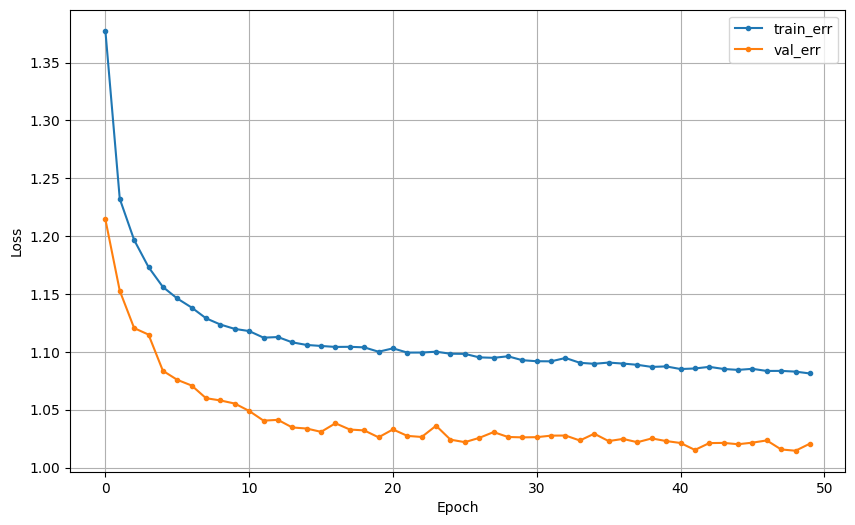

In [119]:
dl_history_plot(history)

In [120]:
y_pred = model.predict(x_val)
y_pred = y_pred.argmax(axis=1)

46/46 [==============================] - 0s 3ms/step


In [122]:
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
# 순서가 있는 클래스일 경우

[[  2  34  25   0   0]
 [  1 260 176   1   0]
 [  0 158 464  38   0]
 [  0  18 196  36   0]
 [  0   5  44  12   0]]
              precision    recall  f1-score   support

           0       0.67      0.03      0.06        61
           1       0.55      0.59      0.57       438
           2       0.51      0.70      0.59       660
           3       0.41      0.14      0.21       250
           4       0.00      0.00      0.00        61

    accuracy                           0.52      1470
   macro avg       0.43      0.29      0.29      1470
weighted avg       0.49      0.52      0.47      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (2) 모델2

### (3) 모델3